In [41]:
import surprise

from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import KNNWithMeans
from surprise import SlopeOne
from surprise.model_selection import cross_validate
from tqdm import tqdm_notebook, tqdm

file_path = 'data/data_train.csv'
tqdm = tqdm_notebook

# I have to convert the 
def deal_line(line):
    pos, rating = line.split(',')
    row, col = pos.split("_")
    row = row.replace("r", "")
    col = col.replace("c", "")
    return int(row), int(col), float(rating)

def read_txt(path):
    """read text file from path."""
    with open(path, "r") as f:
        return f.read().splitlines()
    
lines = read_txt(file_path)[1:]
data = [deal_line(line) for line in lines]

with open('data/kiru.csv', 'w') as f:
    for item in data:
        f.write("{},{},{}\n".format(item[0], item[1], item[2]))


# path to dataset file
file_path = 'data/kiru.csv'
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_file(file_path, reader=reader)

#svd = SVD()

svd = SlopeOne()
print("call cross_validate")

# We can now use this dataset as we please, e.g. calling cross_validate
#abc = cross_validate(svd, data, 
#                     n_jobs=10, # use all cpu
#                     cv=5, verbose=True, 
#                     measures=['RMSE'])

call cross_validate


In [80]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold
from multiprocessing import Pool

def call_algo(i):
    trainset, testset = i
    # train and test algorithm.
    algo = SlopeOne()
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    return (algo, rmse)
        
def predict():
    with Pool(10) as p:
        # define a cross-validation iterator
        kf = KFold(n_splits=5)
        return p.map(call_algo, kf.split(data))

In [ ]:
x = predict()

In [93]:
best_model = min(x, key=lambda b: b[1])

In [105]:
abc = list(map(lambda b: b[1], x))

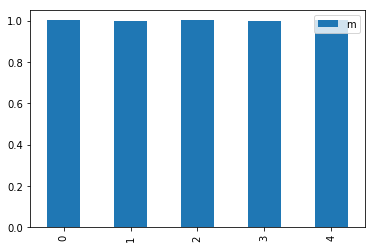

In [110]:
import pandas as pd
pd.DataFrame.from_dict(dict(m=abc)).plot.bar()

In [ ]:
list_of_urls = []
for each in tqdm_notebook(p.imap(call_algo, kf.split(data))i):
    list_of_urls.extend(each)
return list_of_urls

In [85]:
for b in x:
    print(b[1])

1.0011215624783198
0.9989519324203562
1.001439571555036
0.9987288645648029
1.001114490731689


In [69]:
# define a cross-validation iterator
kf = KFold(n_splits=5)

avd = SVD()
cv = cross_validate(avd, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=5)

#print("start")
#for trainset, testset in tqdm_notebook(kf.split(data)):
#    # train and test algorithm.
#    avd.fit(trainset)
#    predictions = avd.test(testset)
#    # Compute and print Root Mean Squared Error
#    accuracy.rmse(predictions, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0286  1.0244  1.0285  1.0289  1.0288  1.0278  0.0017  
Fit time          60.49   64.64   65.25   58.99   54.99   60.87   3.79    
Test time         2.83    2.38    2.10    2.19    1.98    2.29    0.30    


In [73]:
avd

In [68]:
predictions = avd.test(testset)
# Compute and print Root Mean Squared Error
accuracy.rmse(predictions, verbose=True)

RMSE: 1.0257


1.0257002670379434

In [65]:
# print("end call cross_validate:")
import numpy as np
# svd.predict(str(1), str(1))

def create_submission_file(first, second):
    lines = read_txt('data/sample_submission.csv')[1:]
    data = [deal_line(line) for line in lines]

    predictions = []
    for each in tqdm(data):
        pred1 = first.predict(str(each[0]), str(each[1])).est
        pred2 = second.predict(str(each[0]), str(each[1])).est
        predictions.append((each[0], each[1], np.average(np.array([pred1, pred2]))))

    with open('data/our_pred.csv', 'w') as f:
        f.write("Id,Prediction\n")
        for item in tqdm(predictions):
            f.write("r{}_c{},{}\n".format(item[0], item[1], int(round(item[2]))))

In [66]:
create_submission_file(avd, algo)

100%|██████████| 1176952/1176952 [00:02<00:00, 424605.17it/s]


In [46]:
accuracy.rmse(algo, verbose=True)

TypeError: 'SlopeOne' object is not iterable